#Inital Set Up
Here we set up the nessesay imports

Lets start by preping our data frame

In [6]:
# needed to create the data frame
import pandas as pd

# needed to help with speedy maths based calculations
import numpy as np

Now lets import our data that we investigated and prepared

In [7]:
dewpdf = pd.read_csv('https://raw.githubusercontent.com/GreedyOrc/055756_DataAnalytics/main/055756_dewp_ass_data.csv', index_col=0, )

In [8]:
tempdf = pd.read_csv('https://raw.githubusercontent.com/GreedyOrc/055756_DataAnalytics/main/055756_temp_ass_data.csv', index_col=0, )

lets double check that the data import completed correctly

In [9]:
print(dewpdf[:6])

      dayindex  dayofyear  day  year  mo  temp  dewp  NUM_COLLISIONS
2923      2923          1    5  2021   1  39.6  29.3        0.295699
2924      2924          2    6  2021   1  47.4  42.5        0.096774
2926      2926          4    1  2021   1  41.2  37.8        0.215054
2927      2927          5    2  2021   1  38.7  36.1        0.139785
2928      2928          6    3  2021   1  37.4  31.2        0.096774
2929      2929          7    4  2021   1  36.5  26.1        0.446237


In [10]:
print(tempdf[:6])

      dayindex  dayofyear  day  year  mo  temp  dewp  NUM_COLLISIONS
2923      2923          1    5  2021   1  39.6  29.3        0.255158
2924      2924          2    6  2021   1  47.4  42.5        0.083506
2926      2926          4    1  2021   1  41.2  37.8        0.185570
2927      2927          5    2  2021   1  38.7  36.1        0.120620
2928      2928          6    3  2021   1  37.4  31.2        0.083506
2929      2929          7    4  2021   1  36.5  26.1        0.385057


We have added a scale here however its not needed in our case as we have already normilised out data.

In [11]:
SCALE_NUM_COLL = 1.0

We now need to import the library to compile our model with.  

In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


This last import will allow us to plot the data.

In [55]:
import matplotlib.pyplot as plt

#Dewp And Number of Collisions

Here we will create the linear model for the dew point and number of collisions.

In order to import into the data we need to fist creata a data frame and define the headers and data that will be used to train the model.

In [15]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
df_input_data_dewp = [dewpdf["dewp"], dewpdf["NUM_COLLISIONS"]]
# create headers for our new dataframe.
df_input_headers_dewp = ["dewp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
df_input_dewp = pd.concat(df_input_data_dewp, axis=1, keys=df_input_headers_dewp)

We now need to split the data into a training and a testing set. The training set will be used to create the model, we can then use the test data to evaluate how the model compairs to the data. We will use a 80 and 20 % split.

In [16]:
# construct a training set for runnign through the model and a test set
training_set_dewp = df_input_dewp.sample(frac=0.8, random_state=0)
test_set_dewp = df_input_dewp.drop(training_set_dewp.index)

Here is a sample of the data, we can see that we have dropped the index column.

In [17]:
test_set_dewp

,dewp,NUM_COLLISIONS
2936,35.5,0.274194
2944,28.4,0.279570
2948,23.4,0.327957
2950,34.5,0.322581
2953,13.6,0.510753
...,...,...
3993,21.7,0.360215
3994,25.7,0.397849
4002,37.8,0.198925
4005,38.9,0.370968


We remove the number of collisions from the dew point.

In [18]:
# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features_dewp = training_set_dewp.copy()
test_features_dewp = test_set_dewp.copy()

training_labels_dewp = training_features_dewp.pop('NUM_COLLISIONS')
test_labels_dewp = test_features_dewp.pop('NUM_COLLISIONS')

In [73]:
training_labels_dewp

3871    0.231183
3196    0.983871
3530    0.489247
3623    0.516129
4015    0.327957
          ...   
3953    0.822581
3136    0.661290
3372    0.462366
3486    0.543011
3203    0.854839
Name: NUM_COLLISIONS, Length: 857, dtype: float64

Here i kept the option in to adjust the data depending on the scale that we set before - however its not needed in this instance.

In [20]:
# Here I have put in a scale factor and divided by it.
training_labels_dewp = training_labels_dewp/SCALE_NUM_COLL
test_labels_dewp = test_labels_dewp/SCALE_NUM_COLL

In [21]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser_dewp = tf.keras.layers.Normalization(input_shape=[1,], axis=None) # tf.keras.layers.Normalization(axis=-1)
normaliser_dewp.adapt(np.array(training_features_dewp))

In [22]:

model_0 = tf.keras.Sequential([
    normaliser_dewp,
    layers.Dense(units=1)
])

In [87]:
model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [88]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.

%%time
history = model_0.fit(
    training_features_dewp,
    training_labels_dewp,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 7.44 s, sys: 338 ms, total: 7.77 s
Wall time: 7.74 s


In [89]:
# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_model_0 = model_0.evaluate(
    test_features_dewp,
    test_labels_dewp, verbose=2)

7/7 - 0s - loss: 0.1620 - 37ms/epoch - 5ms/step


In [90]:
mean_absolute_error_model_0

0.16197729110717773

In [91]:
# The mean absolute error of the model can be printed out. Remember, we want to minimise this. Perhaps a model with just day and NUM_TRIPS would be better. It will also vary on each training run due to randomisation.
print(mean_absolute_error_model_0)

0.16197729110717773


Here we evaluate the model, at the moment it looks like a decent value. It means that our model is 83.8% accurate.

Lets take some test data and check out how the model runes.

In [92]:
input_0 = pd.DataFrame.from_dict(data =
				{
            'dewp' : [25.7,13.6,45.2]
        })

In [93]:
input_0.head()

,dewp
0,25.7
1,13.6
2,45.2


In [94]:
linear_dewp_predictions_0 = model_0.predict(input_0)*SCALE_NUM_COLL
print(linear_dewp_predictions_0)

1/1 [==============================] - 0s 75ms/step
[[0.34161294]
 [0.28959408]
 [0.42544493]]


It looks ok - now lets run through the data set and plot the output.

In [95]:
linear_dewp_predictions_1 = model_0.predict(test_features_dewp)*SCALE_NUM_COLL


7/7 [==============================] - 0s 2ms/step


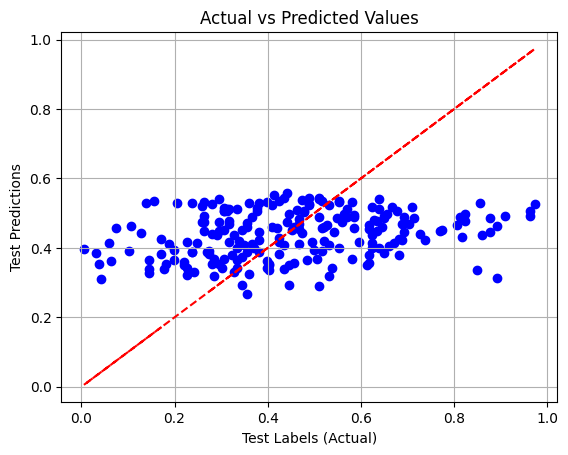

In [96]:
# Plotting the points
plt.scatter( test_labels_dewp, linear_dewp_predictions_1,  color='blue')
plt.plot(test_labels_dewp, test_labels_dewp, color='red', linestyle='--')  # Plotting y=x line for comparison

# Adding labels and title
plt.xlabel('Test Labels (Actual)')
plt.ylabel('Test Predictions')
plt.title('Actual vs Predicted Values')

# Displaying the plot
plt.grid(True)
plt.show()

I was quite suprised by this output. it looks like its clumped majority of the points close to the prediction line however the outlaying data is in incorrect and does not look like a good corrlation. The data is also heavly centered between 0.2 and 0.6 with no points outlaying this section. I would have expected at least a few. This could be caused by the quality of the data used in the model training.

Lets plot how ths data should have looked like.

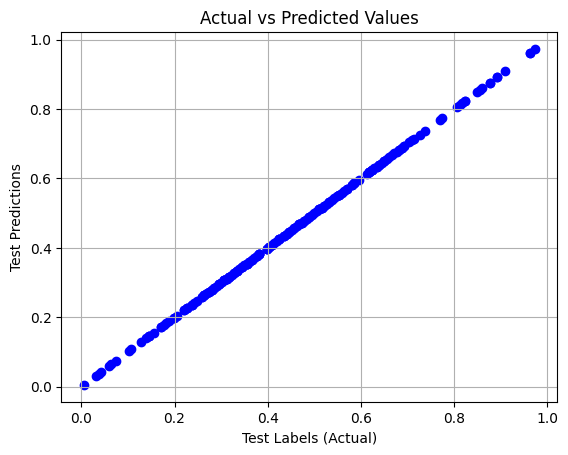

In [104]:
plt.scatter( test_set_dewp.NUM_COLLISIONS, test_set_dewp.NUM_COLLISIONS,  color='blue')

# Adding labels and title
plt.xlabel('Test Labels (Actual)')
plt.ylabel('Test Predictions')
plt.title('Actual vs Predicted Values')

# Displaying the plot
plt.grid(True)
plt.show()

This would have been the ideal model output. At the very least we can say that the model will prdeciy accuratly for tempratures between 42 and 50 f. That is similar to a statement that a broken clock is accurate two times a day. A very dissapointing result.

#Temp And Number of Collisions

Here we will create the linear model for the temperature and number of collisions.

Here we carry out the same model as above.

In [38]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
df_input_data_temp = [tempdf["temp"], tempdf["NUM_COLLISIONS"]]
# create headers for our new dataframe.
df_input_headers_temp = ["temp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
df_input_temp = pd.concat(df_input_data_temp, axis=1, keys=df_input_headers_temp)

In [39]:
# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set_temp = df_input_temp.sample(frac=0.8, random_state=0)
test_set_temp = df_input_temp.drop(training_set_temp.index)

In [40]:
test_set_temp

,temp,NUM_COLLISIONS
2936,41.3,0.236601
2944,36.5,0.241240
2950,35.3,0.278354
2955,41.8,0.167013
2958,37.2,0.575266
...,...,...
3991,41.4,0.427787
3992,36.5,0.228299
4002,46.5,0.317544
4006,39.1,0.553779


In [41]:
# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features_temp = training_set_temp.copy()
test_features_temp = test_set_temp.copy()

training_labels_temp = training_features_temp.pop('NUM_COLLISIONS')
test_labels_temp = test_features_temp.pop('NUM_COLLISIONS')

In [42]:
test_features_temp

,temp
2936,41.3
2944,36.5
2950,35.3
2955,41.8
2958,37.2
...,...
3991,41.4
3992,36.5
4002,46.5
4006,39.1


In [44]:
# Here I have put in a scale factor and divided by it. In this dataset, I had already normalised and thus it is 1. However, 600000 is what would make sense based on the data here and we can use this later when testing our model..
training_labels_temp = training_labels_temp/SCALE_NUM_COLL
test_labels_temp = test_labels_temp/SCALE_NUM_COLL

In [43]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser_temp = tf.keras.layers.Normalization(input_shape=[1,], axis=None) # tf.keras.layers.Normalization(axis=-1)
normaliser_temp.adapt(np.array(training_features_temp))

In [45]:
# I have decided to call the model, model_0. We add our normaliser and we are expecting a single output.
model_1 = tf.keras.Sequential([
    normaliser_temp,
    layers.Dense(units=1)
])

In [47]:
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [48]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.

%%time
history = model_1.fit(
    training_features_temp,
    training_labels_temp,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 7.19 s, sys: 326 ms, total: 7.52 s
Wall time: 10.8 s


In [63]:
# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_model_1 = model_1.evaluate(
    test_features_temp,
    test_labels_temp, verbose=0)

In [64]:
mean_absolute_error_model_1

0.13469970226287842

In [65]:
# The mean absolute error of the model can be printed out. Remember, we want to minimise this. Perhaps a model with just day and NUM_TRIPS would be better. It will also vary on each training run due to randomisation.
print(mean_absolute_error_model_1)

0.13469970226287842


In [52]:
input_1 = pd.DataFrame.from_dict(data =
				{
            'temp' : [41.3,36.5,35.3]
        })

In [53]:
input_1.head()

,temp
0,41.3
1,36.5
2,35.3


In [54]:
linear_temp_predictions_0 = model_1.predict(input_1)*SCALE_NUM_COLL
print(linear_temp_predictions_0)

1/1 [==============================] - 0s 56ms/step
[[0.46581045]
 [0.45148107]
 [0.44789872]]


In [ ]:
test_predictions = model_0.predict(input_1)*SCALE_NUM_COLL



1/1 [==============================] - 0s 23ms/step


In [ ]:
test_predictions

array([[0.34898084],
       [0.31064633],
       [0.41075963]], dtype=float32)

In [68]:
linear_temp_predictions_1 = model_1.predict(test_features_temp)*SCALE_NUM_COLL

7/7 [==============================] - 0s 3ms/step


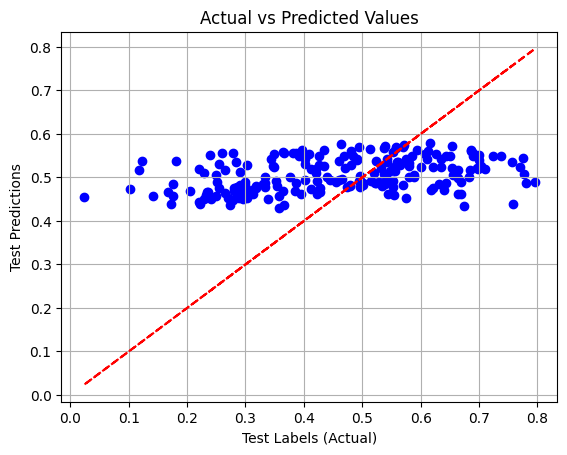

In [69]:
# Plotting the points
plt.scatter(test_labels_temp, linear_temp_predictions_1, color='blue')
plt.plot(test_labels_temp, test_labels_temp, color='red', linestyle='--')  # Plotting y=x line for comparison

# Adding labels and title
plt.xlabel('Test Labels (Actual)')
plt.ylabel('Test Predictions')
plt.title('Actual vs Predicted Values')

# Displaying the plot
plt.grid(True)
plt.show()

As we can see from the above evaulation plot our model has done the same type of output where the data is a flat line limited between two values. Again I'm not sure if this is becasue of the quality of the data. A disapointing result again.

This is a suprise as the evaluation of the model produces an error rate of 13%, the above graph conclits this evaulation.

#Conclusion
In conclusion the models for dew point and temperature both received decent evaulations with error rate of 16% and 13%. When plotting the data however this showed a discrepency between the error rate evaluated and the output of the model. I beleive that the issue lay in the data issued from assessment 1.

A data set with multple corrolating columns could have produced a better model to be used to predict the number collisions on the weather.